### Library

In [4]:
import kagglehub
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\Natan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import dataset

##### Dataset ini memuat data medis dari 299 pasien dengan kondisi gagal jantung. Fitur seperti usia, tekanan darah, anemia, diabetes, ejection fraction, dan kreatinin serum digunakan untuk memprediksi apakah pasien meninggal selama rawat inap (DEATH_EVENT: 1 = meninggal, 0 = tidak).

In [5]:
path = kagglehub.dataset_download("andrewmvd/heart-failure-clinical-data")
print("Path ke file dataset:", path)

100%|██████████| 3.97k/3.97k [00:00<00:00, 4.04MB/s]

Extracting files...
Path ke file dataset: C:\Users\Natan\.cache\kagglehub\datasets\andrewmvd\heart-failure-clinical-data\versions\1


### Load dataset

In [ ]:
df = pd.read_csv(path + "/heart_failure_clinical_records_dataset.csv")
print("Jumlah data:", df.shape)
print("Contoh data:\n", df.head())
print("Kolom:\n", df.columns)

Jumlah data: (299, 13)
Contoh data:
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1  

### Preprocessing

##### Tidak ada data kosong, namun duplikasi dicek dan dihapus.
##### Fitur dinormalisasi menggunakan `StandardScaler`.
##### Data dibagi menjadi 80% data latih dan 20% data uji.

In [ ]:
print("Missing values:\n", df.isnull().sum())

df = df.drop_duplicates()
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Cek distribusi label
print("Distribusi label:\n", y.value_counts())


Missing values:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64
Distribusi label:
 DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


### Implementasi Model Random Forest

In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Prediksi (y_pred):", y_pred[:5])
print("Label sebenarnya:", y_test.values[:5])

Prediksi (y_pred): [0 0 0 1 0]
Label sebenarnya: [0 0 1 1 0]


### Evaluasi Model

Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



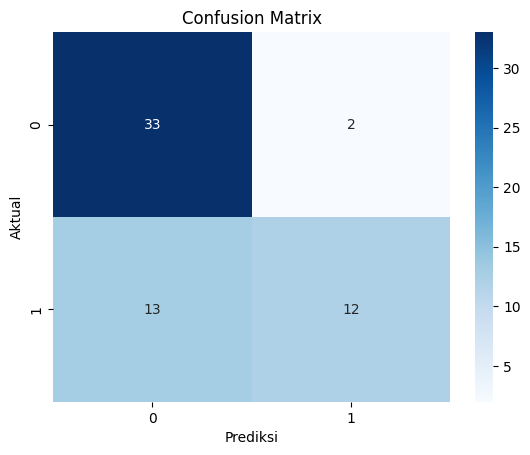

In [ ]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Classification Report:")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()


### Prediksi data baru

In [16]:
import numpy as np

# Fungsi untuk membuat data pasien secara acak
def generate_random_patients(n=5):
    data = {
        'age': np.random.randint(40, 90, size=n),
        'anaemia': np.random.randint(0, 2, size=n),
        'creatinine_phosphokinase': np.random.randint(20, 800, size=n),
        'diabetes': np.random.randint(0, 2, size=n),
        'ejection_fraction': np.random.randint(15, 70, size=n),
        'high_blood_pressure': np.random.randint(0, 2, size=n),
        'platelets': np.random.randint(100000, 400000, size=n),
        'serum_creatinine': np.round(np.random.uniform(0.5, 5.0, size=n), 2),
        'serum_sodium': np.random.randint(120, 150, size=n),
        'sex': np.random.randint(0, 2, size=n),
        'smoking': np.random.randint(0, 2, size=n),
        'time': np.random.randint(0, 300, size=n),
    }
    return pd.DataFrame(data)

# Generate data pasien acak
random_patients = generate_random_patients(n=5)

# Standarisasi data baru
random_patients_scaled = scaler.transform(random_patients)

# Prediksi menggunakan model
predictions = model.predict(random_patients_scaled)

# Tampilkan hasil
for i, row in random_patients.iterrows():
    print(f"\n🔍 Pasien {i+1}")
    print(row)
    print("Prediksi:", "Meninggal" if predictions[i] == 1 else "Tidak meninggal")



🔍 Pasien 1
age                             88.00
anaemia                          0.00
creatinine_phosphokinase       415.00
diabetes                         0.00
ejection_fraction               50.00
high_blood_pressure              1.00
platelets                   397862.00
serum_creatinine                 4.86
serum_sodium                   123.00
sex                              0.00
smoking                          0.00
time                           234.00
Name: 0, dtype: float64
Prediksi: Tidak meninggal

🔍 Pasien 2
age                             77.00
anaemia                          0.00
creatinine_phosphokinase       282.00
diabetes                         0.00
ejection_fraction               68.00
high_blood_pressure              1.00
platelets                   347640.00
serum_creatinine                 2.36
serum_sodium                   144.00
sex                              0.00
smoking                          0.00
time                            57.00
Name: 1, dtype